In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

In [4]:
from prophet import Prophet

In [6]:
pinkwink_web = pd.read_excel('/home/seungsu/workspace/file/pinkwink_web.xlsx', names=['ds', 'hit'])
pinkwink_web.head()

,ds,hit
0,2016-01-01,228
1,2016-01-02,304
2,2016-01-03,304
3,2016-01-04,659
4,2016-01-05,769


In [11]:
df = pd.DataFrame({'ds': pd.to_datetime(pinkwink_web['ds'], format = "%y. %m. %d."), 'y': pinkwink_web['hit']})

In [22]:
df

,ds,y
0,2016-01-01,228
1,2016-01-02,304
2,2016-01-03,304
3,2016-01-04,659
4,2016-01-05,769
...,...,...
1091,2018-12-27,1264
1092,2018-12-28,1061
1093,2018-12-29,729
1094,2018-12-30,656


14:40:41 - cmdstanpy - INFO - Chain [1] start processing
14:40:41 - cmdstanpy - INFO - Chain [1] done processing


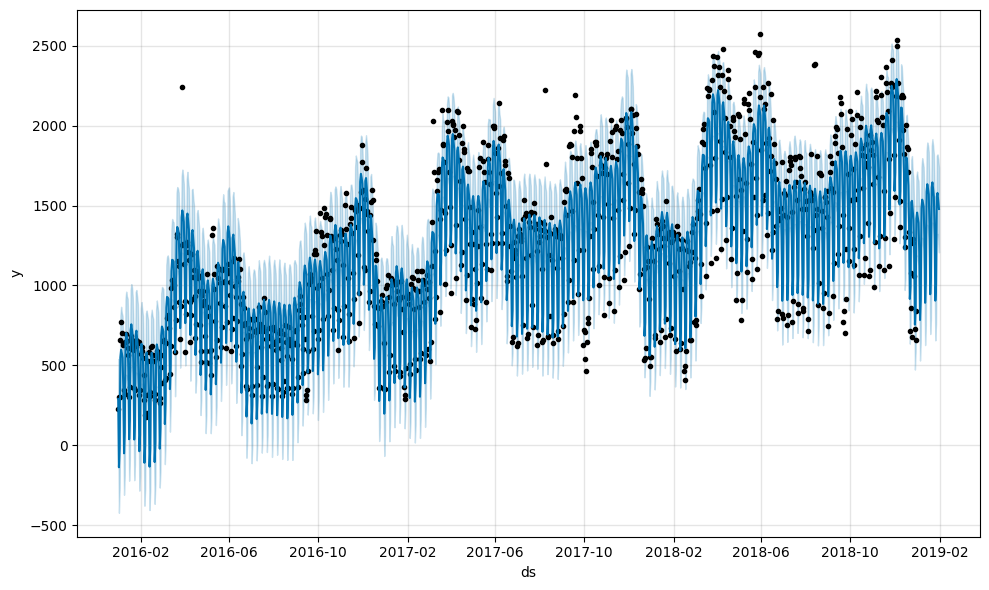

In [12]:
m = Prophet(yearly_seasonality = True , daily_seasonality = True)
m.fit(df)
future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
m.plot(forecast);

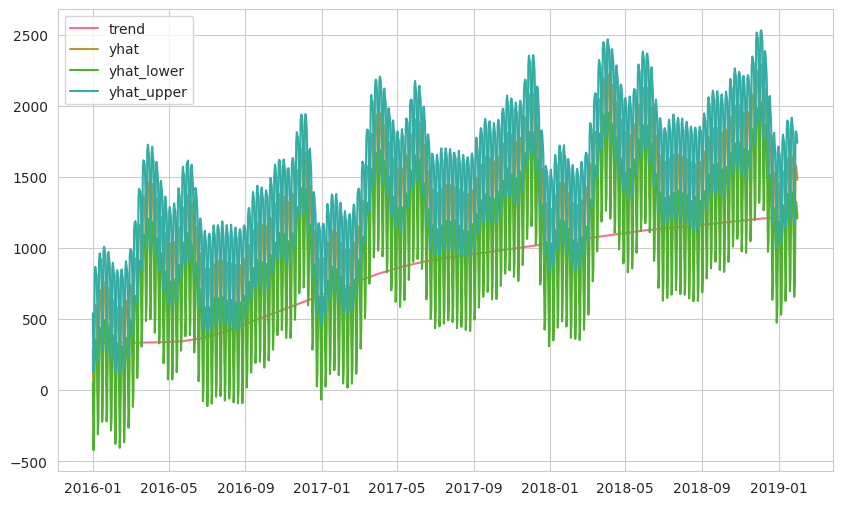

In [15]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('husl')

plt.figure(figsize=(10,6))
for each in ['trend', 'yhat', 'yhat_lower', 'yhat_upper']:
    plt.plot(forecast['ds'], forecast[each], label = each)
    
plt.legend(loc='best')
plt.show()

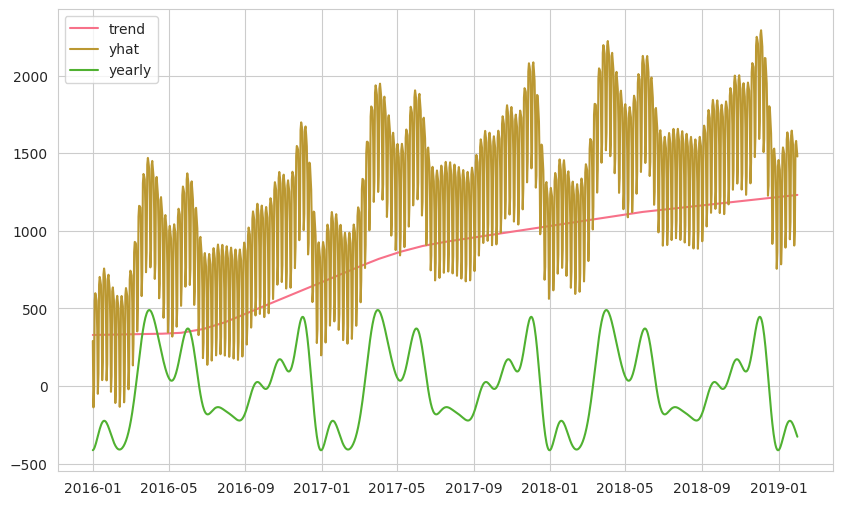

In [20]:
plt.figure(figsize=(10,6))
for each in ['trend', 'yhat', 'yearly']:
    plt.plot(forecast['ds'], forecast[each], label=each)
plt.legend(loc='best')
plt.show()

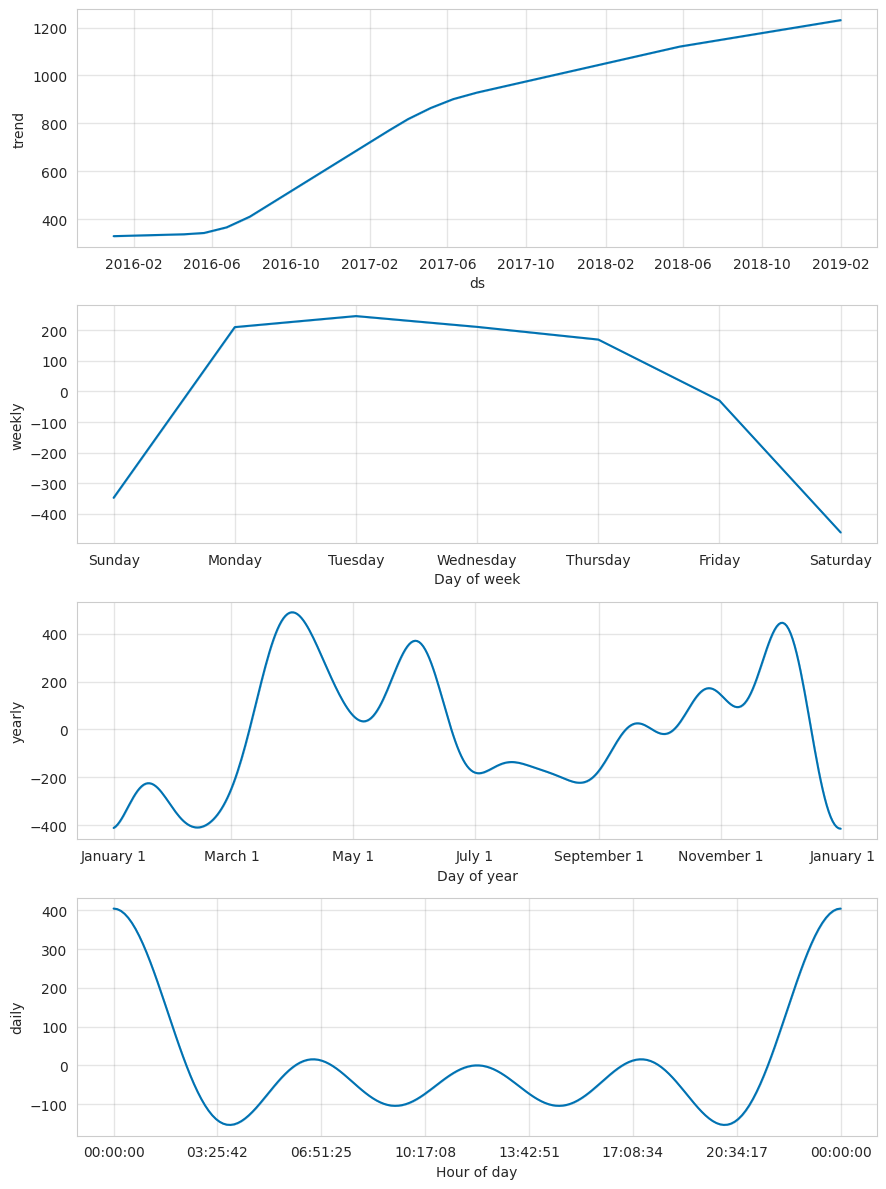

In [21]:
m.plot_components(forecast);